In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para deixar os gráficos mais bonitos
sns.set_style('whitegrid')

# Carregando o arquivo csv para dentro de um DataFrame (uma tabela programável)
df = pd.read_csv('train.csv')

# Exibindo as 5 primeiras linhas para ver a cara dos dados
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Mostra o tipo de cada coluna e quantos valores não nulos existem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 1. Calcular a média de idade
media_idade = df['Age'].mean()
print(f'A média de idade é: {media_idade:.1f} anos')

# 2. Preencher os valores vazios (fillna) com essa média --- Afinal muitas pessoas não tem idade declarada no csv
# A gente atribui o resultado de volta à coluna 'Age'
df['Age'] = df['Age'].fillna(media_idade)

# 3. Verificar se ainda existe algum nulo
print(f"Valores nulos após tratamento: {df['Age'].isnull().sum()}")

A média de idade é: 29.7 anos
Valores nulos após tratamento: 0


In [10]:
# 1. Apagar a coluna 'Cabin' porque tem muita informação faltando ----- "chutar" esse tipo de informação é arriscado demais.
df = df.drop('Cabin', axis=1)

# 2. Apagar as poucas linhas onde 'Embarked' está vazio (são só 2 passageiros)
df = df.dropna()

# 3. Conferir se está tudo 100% limpo agora
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


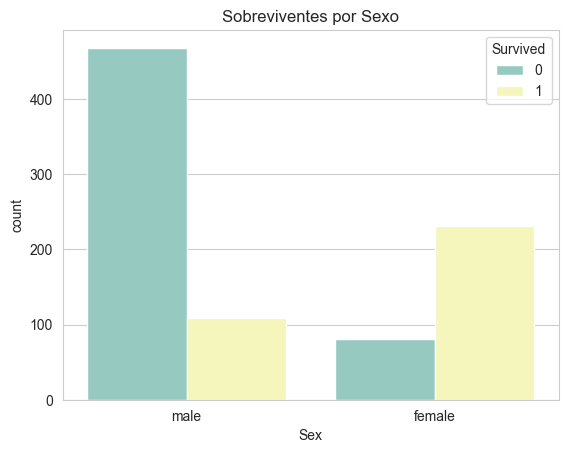

In [11]:
# Gráfico de barras: Sobreviventes dividido por Sexo
# ----------------------
# x = eixo horizontal (Sexo)
# hue = o que vai colorir as barras (Sobreviveu ou Não?)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sobreviventes por Sexo')
plt.show()

#### "Mulheres e crianças primeiro".

No Titanic, essa regra foi levada muito a sério por alguns oficiais. O gráfico mostra uma desproporção enorme: a barra azul (morreu) dos homens é gigante, enquanto a barra laranja (sobreviveu) das mulheres é muito maior que a de mortes delas.

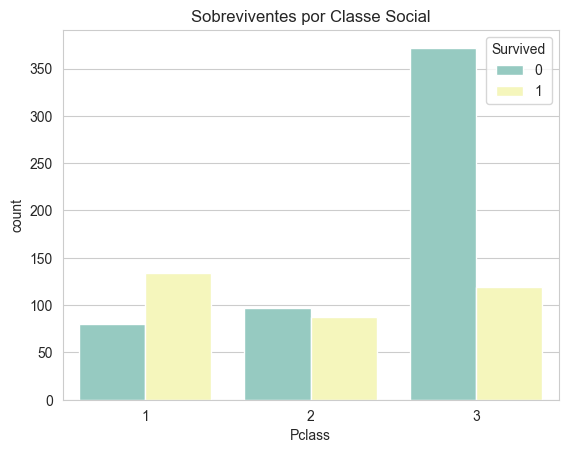

In [13]:
# Analisando Sobrevivência por Classe (1 = Alta, 2 = Média, 3 = Baixa)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Sobreviventes por Classe Social')
plt.show()

#### Status Social foi determinante.

Historicamente, isso aconteceu porque as cabines da 3ª classe ficavam nos níveis inferiores do navio, dificultando o acesso ao convés onde estavam os botes. Além disso, em alguns momentos, portões foram trancados para impedir que a multidão subisse de uma vez.

In [14]:
# Salvando o DataFrame tratado em um novo arquivo CSV
# index=False serve para não criar uma coluna extra com os números das linhas
df.to_csv('titanic_tratado.csv', index=False)

print("Arquivo 'titanic_tratado.csv' salvo com sucesso!")

Arquivo 'titanic_tratado.csv' salvo com sucesso!


## Machine Learning

In [15]:
# Mapeando Sexo para números: male = 0, female = 1 --- Afinal computadores não entendem FEMALE e MALE, por isso tranformo texto em números
# (Isso é chamado de Label Encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Vamos verificar como ficou
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### Separando as Variáveis para a Árvore de Decisão:

In [16]:
# Definindo as colunas que a máquina vai usar para aprender
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# X = Os dados da prova
X = df[features]

# y = O gabarito
y = df['Survived']

# Conferindo se está tudo certo
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (889, 6)
Shape de y: (889,)


In [18]:
!pip install scikit-learn

  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.7 MB 15.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 17.1 MB/s  0:00:00
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ------

In [19]:
from sklearn.model_selection import train_test_split

# Dividindo os dados: 20% para teste (test_size=0.2) e fixando a aleatoriedade (random_state=42)
# random_state=42 é uma piada interna de programadores (Guia do Mochileiro das Galáxias) para garantir que seu resultado seja igual ao meu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Treinando com {len(X_train)} passageiros e testando com {len(X_test)} passageiros.")

Treinando com 711 passageiros e testando com 178 passageiros.


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Criar o modelo de Árvore de Decisão
modelo = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo com os dados de TREINO
modelo.fit(X_train, y_train)

# 3. Fazer previsões nos dados de TESTE (que o modelo nunca viu)
previsoes = modelo.predict(X_test)

# 4. Calcular a acurácia (quantos % ele acertou?)
acuracia = accuracy_score(y_test, previsoes)
print(f"Acurácia do Modelo: {acuracia:.2%}")

Acurácia do Modelo: 75.84%


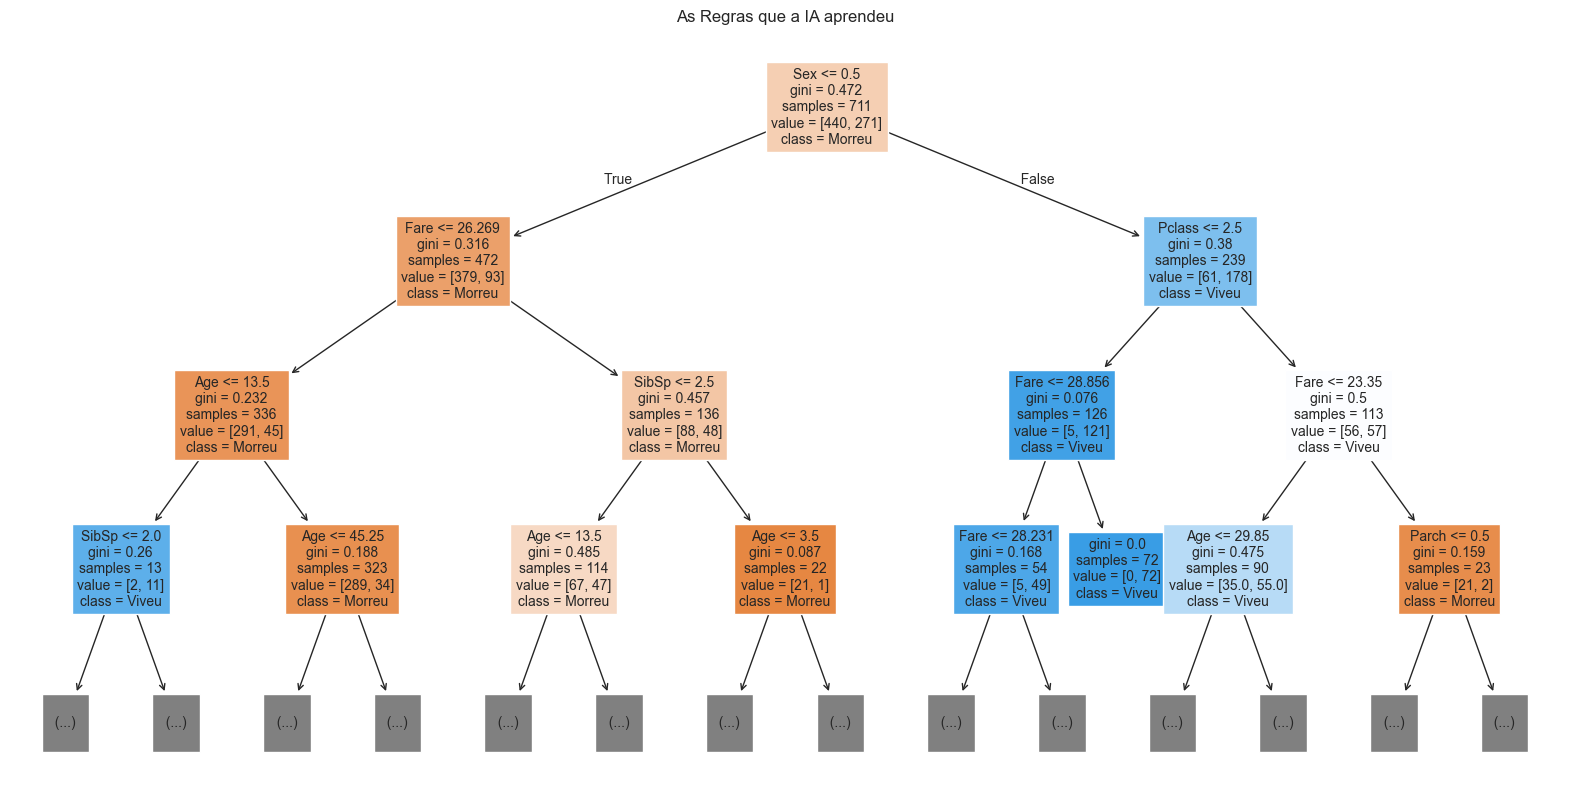

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10)) # Aumenta o tamanho da imagem
plot_tree(modelo, feature_names=features, class_names=['Morreu', 'Viveu'], filled=True, max_depth=3, fontsize=10)
plt.title("As Regras que a IA aprendeu")
plt.show()

### Envio para o Kaggle
#### O Grand Finale

In [23]:
# 1. Carregar os dados de DESAFIO (que não tem a resposta 'Survived')
teste_kaggle = pd.read_csv('test.csv')

# 2. LIMPEZA (Tem que fazer igualzinho fizemos no treino)
# Mapear Sexo
teste_kaggle['Sex'] = teste_kaggle['Sex'].map({'male': 0, 'female': 1})

# Preencher Idade vazia com a média (usamos a média do treino para ser justo)
teste_kaggle['Age'] = teste_kaggle['Age'].fillna(df['Age'].mean())

# Preencher 'Fare' (Tarifa) vazia (pode acontecer no teste) com a média
teste_kaggle['Fare'] = teste_kaggle['Fare'].fillna(df['Fare'].mean())

# 3. Selecionar apenas as colunas que o modelo conhece
X_desafio = teste_kaggle[features]

# 4. Usar a Inteligência Artificial para prever
previsoes_finais = modelo.predict(X_desafio)

# 5. Criar a tabela final para envio
submissao = pd.DataFrame({
    'PassengerId': teste_kaggle['PassengerId'],
    'Survived': previsoes_finais
})

# 6. Salvar o arquivo CSV pronto para o Kaggle
submissao.to_csv('submissao_titanic.csv', index=False)
print("Arquivo 'submissao_titanic.csv' gerado com sucesso!")
display(submissao.head())

Arquivo 'submissao_titanic.csv' gerado com sucesso!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
